## AKT Inhibition from Wiechmann et al. 2021

In [1]:
#Supporting packages for analysis
import numpy as np
import pandas as pd

#KSTAR imports
from kstar.plot import DotPlot

import sys
sys.path.append('../')
import conf #This is the local config file for setting the supplements directory to your local environment


#Set matplotlib defaults for arial 12 point font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12
import matplotlib.pyplot as plt

#Directory where KSTAR Supplemental data was set 
odir = conf.SUPPLEMENTS_DIR+'Control_Experiments (Fig2)/AKT_Weichmann_2021'

#load the Mann Whitney activities and FPR for Tyrosine predictions, 
#it will be faster and less data than loading all KSTAR outputs
activities = pd.read_csv(odir+'/RESULTS/ST/akt_inhib_mann_whitney_activities.tsv', sep='\t', index_col=0)
fpr = pd.read_csv(odir+'/RESULTS/ST/akt_inhib_mann_whitney_fpr.tsv', sep='\t', index_col=0)

#set preferred kinase names (make a kinase_dict)
kinase_dict = {}
for kinase in activities.index:
    kinase_dict[kinase] = conf.KINASE_MAP.loc[kinase,'Preferred Name']

(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
        265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385,
        395, 405, 415, 425]),
 [])

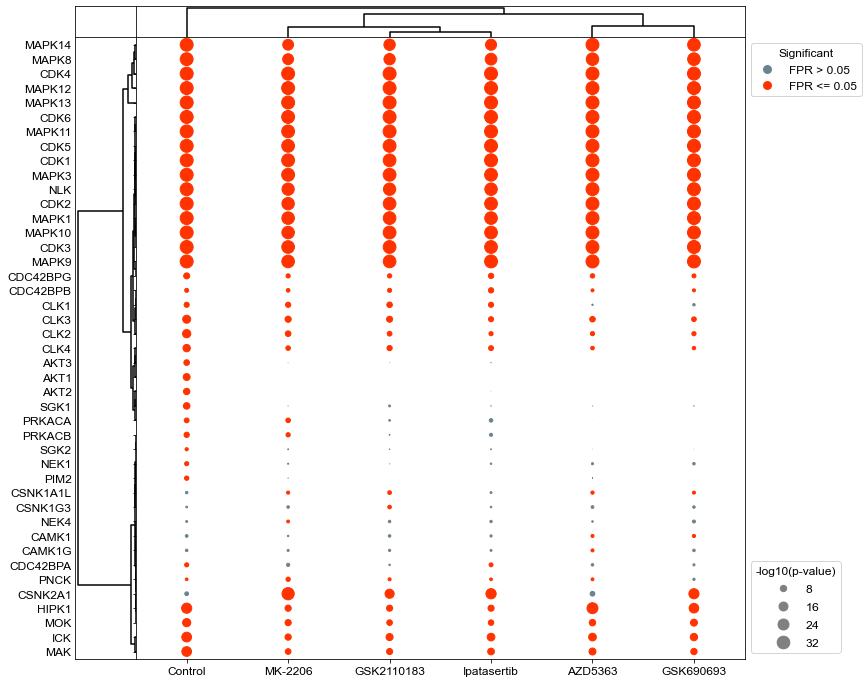

In [2]:
results = -np.log10(activities)
fig, axes = plt.subplots(figsize = (12, 12), 
        nrows = 2, ncols = 2, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = {
            'height_ratios':[0.05, 1], 
            'width_ratios':[0.1,1]
        },)
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       fpr, 
                       figsize = (10,15), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)',
                      kinase_dict = kinase_dict)
dots.drop_kinases_with_no_significance()
#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.
dots.cluster(orientation = 'left', ax = axes[1,0], method='ward')
dots.cluster(orientation = 'top', ax = axes[0,1], method='ward')

dots.dotplot(ax = axes[1,1])
axes[1,0].set_xticks([])
axes[0,0].set_yticks([])
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(fontsize = 12)

(array([ 5, 15, 25, 35, 45, 55]),
 [Text(0, 5, 'CSNK2A1'),
  Text(0, 15, 'PRKACB'),
  Text(0, 25, 'PRKACA'),
  Text(0, 35, 'AKT3'),
  Text(0, 45, 'AKT2'),
  Text(0, 55, 'AKT1')])

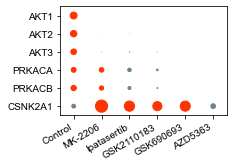

In [5]:
kinases = ['AKT1','AKT2','AKT3','PRKACA','PRKACB','CSNK2A1']
order = ['data:Control','data:MK-2206','data:Ipatasertib','data:GSK2110183','data:GSK690693', 'data:AZD5363']
results = -np.log10(activities)
results = results.loc[kinases, order]
significant = fpr.loc[kinases, order]
#Setup subplots so that dendrograms are included
fig, axes = plt.subplots(figsize = (3, 2), 
        nrows = 1, ncols = 1, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = {
            'height_ratios':[1], 
            'width_ratios':[1]
        },)
fig.subplots_adjust(wspace=0, hspace=0)



dots = DotPlot(results, 
                       fpr, 
                       figsize = (10,15), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)',
                       kinase_dict = kinase_dict)


dots.dotplot(ax = axes, color_legend = False, size_legend = False)
plt.xticks(rotation = 30, fontsize = 10,ha = 'right')
plt.yticks(fontsize = 10)